# Práctica 4b: "Gastos por Persona en México"

In [1]:
import pandas as pd

path = 'gastospersona.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

C:\Users\MaryJose03\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ï»¿folioviv,foliohog,numren,clave,tipo_gasto,mes_dia,frec_rem,inst,forma_pag1,forma_pag2,forma_pag3,inscrip,colegia,material,cantidad,gasto,costo,gasto_tri,gasto_nm,gas_nm_tri
0,100027202,1,2,J016,G4,0,8,,0,0,0,,,,,,1500,,1500,1467.39
1,100027202,1,2,J031,G4,0,8,,0,0,0,,,,,,885,,885,865.76
2,100027202,1,2,J035,G4,0,8,,0,0,0,,,,,,439,,439,429.45
3,100045501,1,1,F003,G4,0,8,,0,0,0,,,,,,200,,200,580.64
4,100045505,1,1,H056,G4,0,6,,0,0,0,,,,,,200,,200,195.65


In [2]:
df.dtypes

ï»¿folioviv     int64
foliohog        int64
numren          int64
clave          object
tipo_gasto     object
mes_dia         int64
frec_rem       object
inst           object
forma_pag1      int64
forma_pag2      int64
forma_pag3      int64
inscrip        object
colegia        object
material       object
cantidad       object
gasto          object
costo          object
gasto_tri      object
gasto_nm       object
gas_nm_tri     object
dtype: object

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

aux=df[['mes_dia']].copy()
train_data,test_data=train_test_split(aux,test_size=0.2)
train_data.shape,test_data.shape

((318597, 1), (79650, 1))

## Estandarizámos

In [4]:
scaler = StandardScaler()
scaler.fit(train_data)

print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))
print("transformación test:\n", pd.DataFrame(scaler.transform(test_data)))

transformación train:
                0
0       0.536250
1      -2.504460
2       0.539228
3      -0.056406
4       0.238433
...          ...
318592  0.563053
318593  0.506468
318594 -2.504460
318595  0.214608
318596  0.488599

[318597 rows x 1 columns]
transformación test:
               0
0     -2.504460
1     -2.504460
2      0.774503
3     -2.504460
4      0.178870
...         ...
79645  0.485621
79646  0.476686
79647  0.509446
79648  0.807263
79649  0.178870

[79650 rows x 1 columns]


## Vemos medidas de tendencia central

In [5]:
print("media:", scaler.mean_)
print("desviación estándar:", scaler.var_)

media: [840.93972009]
desviación estándar: [112746.13917684]


##Aplicamos transformacion logaritmica
las transformaciones logarítmicas pueden ajustar la distribución de los datos a una distribución menos sesgada, por ejemplo, de tipo gaussiano.

In [6]:
import pandas as pd
import numpy as np


print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(np.log1p(train_data)))

train:
         mes_dia
306103     1021
109928        0
350566     1022
129361      822
244158      921
...         ...
326653     1030
61399      1011
106064        0
364241      913
357328     1005

[318597 rows x 1 columns]
transformación train:
          mes_dia
306103  6.929517
109928  0.000000
350566  6.930495
129361  6.712956
244158  6.826545
...          ...
326653  6.938284
61399   6.919684
106064  0.000000
364241  6.817831
357328  6.913737

[318597 rows x 1 columns]


## Transformación Yeo-Johnson
La transformación de Yeo-Johnson es una función compuesta de transformación que permite valores negativos, a diferencia de la transformación de Box-Cox.

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(train_data_trans))

print("lambdas:",pt.lambdas_) # Automatically selected 
print("media:", np.mean(train_data_trans)) 
print("desviación estándar:", np.std(train_data_trans))

train:
         mes_dia
306103     1021
109928        0
350566     1022
129361      822
244158      921
...         ...
326653     1030
61399      1011
106064        0
364241      913
357328     1005

[318597 rows x 1 columns]
transformación train:
                0
0       0.539728
1      -2.499835
2       0.542792
3      -0.068180
4       0.233762
...          ...
318592  0.567309
318593  0.509090
318594 -2.499835
318595  0.209326
318596  0.490712

[318597 rows x 1 columns]
lambdas: [1.02946841]
media: 3.229364624841493e-16
desviación estándar: 0.9999999999999999


## RankGauss

RankGauss es un enfoque para convertir los valores a rangos, y después convierte estos rangos a otro valor numérico siguiendo una distribución Gaussiana

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import QuantileTransformer

df = pd.DataFrame(np.random.randint(0,100,size=(10, 2)), columns=['gasto_tri','gasto_nm'])
df

,gasto_tri,gasto_nm
0,19,47
1,83,76
2,61,81
3,6,74
4,4,70
5,61,22
6,70,99
7,39,75
8,39,5
9,21,59


In [9]:
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal')
transformer.fit(df[['gasto_tri']])
df['gasto_tri_RankGauss'] = transformer.transform(df[['gasto_tri']])
df[['gasto_tri','gasto_tri_RankGauss']]

,gasto_tri,gasto_tri_RankGauss
0,19,-0.764710
1,83,5.199338
2,61,0.764710
3,6,-1.220640
4,4,-5.199338
5,61,0.764710
6,70,1.220640
7,39,0.000000
8,39,0.000000
9,21,-0.430727


## Rango
Este método funciona convirtiendo los valores numéricos en rangos de valores. Cuando se analiza el número de clientes en una tienda, es probable que el número de clientes en días festivos sea mucho mayor que el de los días de semana. Cambiar los números a rangos puede neutralizar el impacto del número absoluto de clientes.

In [10]:
import pandas as pd

df = pd.DataFrame(np.random.randint(0,100,size=(10, 1)), columns=['gasto_tri'])
df

,gasto_tri
0,98
1,32
2,31
3,76
4,56
5,47
6,4
7,9
8,21
9,56


In [11]:
df['gasto_tri_rank'] = df.gasto_tri.rank().astype('int')  
df[['gasto_tri','gasto_tri_rank']]

,gasto_tri,gasto_tri_rank
0,98,10
1,32,5
2,31,4
3,76,9
4,56,7
5,47,6
6,4,1
7,9,2
8,21,3
9,56,7


## Escala min-max
La escala mín-máx es otra de las simples transformaciones de las variables numéricas. Con la escala mín-máx, los valores deben ser convertidos a los valores dentro de [0,1].



In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train_data = pd.DataFrame({'var1':[-1, 0, 1, 2]})
test_data = pd.DataFrame({'var1':[2.5]})

print("train:\n", train_data)
print("test:\n", test_data)

scaler = MinMaxScaler()
scaler.fit(train_data)
print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))
print("transformación test:\n", pd.DataFrame(scaler.transform(test_data)))

train:
    var1
0    -1
1     0
2     1
3     2
test:
    var1
0   2.5
transformación train:
           0
0  0.000000
1  0.333333
2  0.666667
3  1.000000
transformación test:
           0
0  1.166667


In [13]:
train_data = pd.DataFrame({'var1':[-1, 0, 1, 250]}) # Data including outlier.
scaler = MinMaxScaler()
scaler.fit(train_data)
print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))

transformación train:
           0
0  0.000000
1  0.003984
2  0.007968
3  1.000000


## Transformación logarítmica
Cuando la distribución de la variable tiene una distribución de larga duración (long-tailed distribution) (por ejemplo, ingresos individuales, gastos médicos individuales, etc.), las transformaciones logarítmicas pueden ajustar la distribución de los datos a una distribución menos sesgada, por ejemplo, de tipo gaussiano.

In [14]:
import pandas as pd
import numpy as np

train_data = pd.DataFrame({'var1':[1,10, 100, 1000, 10000, 100000]})
test_data = pd.DataFrame({'var1':[2.5]})

print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(np.log1p(train_data)))

train:
      var1
0       1
1      10
2     100
3    1000
4   10000
5  100000
transformación train:
         var1
0   0.693147
1   2.397895
2   4.615121
3   6.908755
4   9.210440
5  11.512935


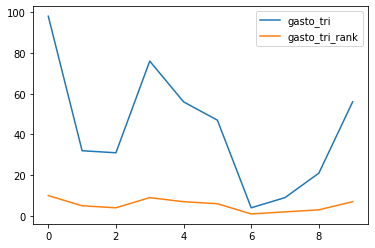

In [16]:
df.plot()